# Семинар 7. Визуализация данных. Знакомство с sklearn.

Обратите внимание, что на семинаре 22 марта будет проверочная работа.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import pylab as plt
%matplotlib inline

## Квартет Энскомба

Наборы данных имеют одинаковое среднее, дисперсию, коэффициент корреляции. 

In [501]:
data = np.array([
        [
            [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0], 
            [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
        ],
        [
            [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0],
            [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]
        ],
        [
            [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0],
            [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]
        ],
        [
            [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0],
            [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
        ]
    ])

In [502]:
%precision 2
for i in range(data.shape[0]):
    print "MEAN: ", data[i].mean(axis=1), "STD: ", data[i].std(axis=1), "CORR: ", np.corrcoef(data[i])[0, 1]

MEAN:  [ 9.   7.5] STD:  [ 3.16  1.94] CORR:  0.816420516345
MEAN:  [ 9.   7.5] STD:  [ 3.16  1.94] CORR:  0.816236506
MEAN:  [ 9.   7.5] STD:  [ 3.16  1.94] CORR:  0.81628673949
MEAN:  [ 9.   7.5] STD:  [ 3.16  1.94] CORR:  0.816521436889


Кроме того, решение задачи линейной ререссии дает для них одно и тоже уравнение:

$y = 3 + 0.5x$

Что же будет если их визуализировать?

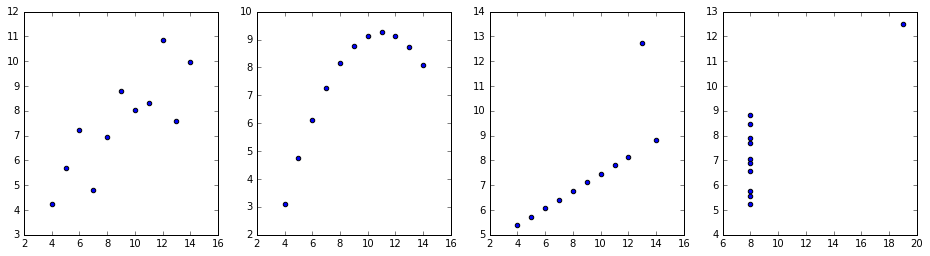

In [503]:
plt.figure(figsize=(16, 4))
for idx, X in enumerate(data):
    plt.subplot(1, 4, idx + 1)
    plt.scatter(X[0], X[1])

## Корреляция между признаками

Иногда бывает удобно посмотреть (например, видно линейно зависимые признаки).

In [2]:
from sklearn import datasets

In [3]:
boston = datasets.load_boston()

In [4]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [73]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()

CRIM  ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

Но огромные таблицы, особенно если признаков очень много, сложно анализировать:

In [508]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.452220 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   

              DIS       RAD       TAX   PTRATIO         B     LSTAT  
CRIM    -0.377904  0.622029  0.579564  0.288250 -0.377365  0.452220  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000

Поэтому давайте визуализируем ее!

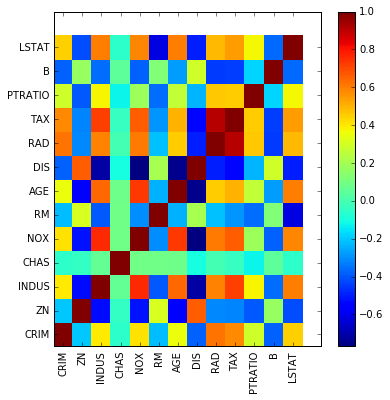

In [74]:
correlation = data.corr()
plt.figure(figsize=(6, 6))
plt.pcolor(correlation)
plt.xticks(np.arange(0.5, len(data.columns)), data.columns, rotation='vertical')
plt.yticks(np.arange(0.5, len(data.columns)), data.columns)
plt.colorbar()

Функция colorbar строит соответствие цвета и значения. Обратите внимание, что функция pcolor принимает на вход просто некоторую матрицу. Например, можно (зачем-то) визуализировать все признаки:

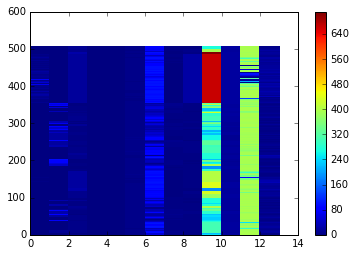

In [55]:
plt.pcolor(data.values)
plt.colorbar()

Это называется "hotmap" – чем больше значение, тем "горячее" цвет.

## Сэмплирование?

Хочется посмотреть на признак, но данных очень много. Давайте возьмем случайное подмножество точек и будем смотреть на них.

In [56]:
points = np.random.choice(data.AGE, 100)

## Посмотрим на признаки повнимательнее

Как визуализировать один признак?

Например, **набор точек на прямой**

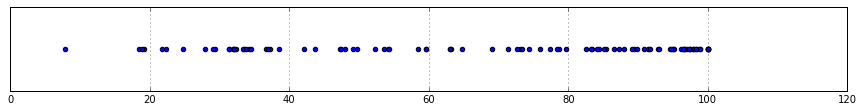

In [511]:
plt.figure(figsize=(15, 1.5)), plt.grid(True, axis='x'), plt.yticks([])
plt.scatter(points, np.zeros(points.shape[0]))

Недостатки: не видно плотности точек в некоторых участках.

Что с этим можно сделать? Например, для каждой точки выберем случайно вертикальную координату (**jitter**)

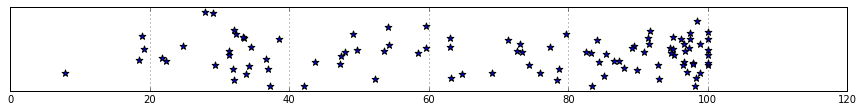

In [512]:
plt.figure(figsize=(15, 1.5)), plt.grid(True, axis='x'), plt.yticks([])
plt.scatter(points, np.random.randn(points.shape[0]), marker='*', s=50)

Можно построить **гистограмму**:

(array([  1.,   6.,  14.,   6.,   7.,   8.,   3.,   9.,  13.,  33.]),
 array([   7.8 ,   17.02,   26.24,   35.46,   44.68,   53.9 ,   63.12,
          72.34,   81.56,   90.78,  100.  ]),
 <a list of 10 Patch objects>)

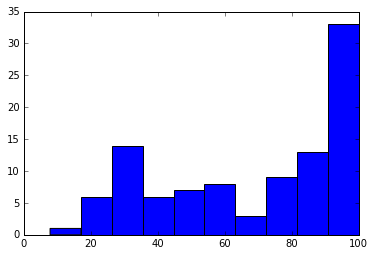

In [513]:
plt.hist(points)

При этом если признаков несколько, то можно их все построить на одной гистограмме:

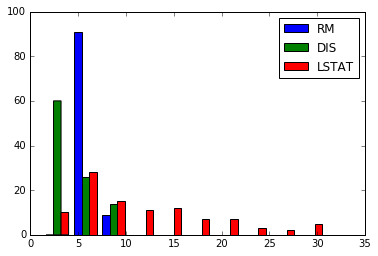

In [44]:
random_indexies = np.random.choice(data.index, 100)

tot_points = data['RM'][random_indexies]
other_points = data['DIS'][random_indexies]
free_points = data['LSTAT'][random_indexies]

plt.hist([tot_points, other_points, free_points])
plt.legend(('RM', 'DIS', 'LSTAT'), loc='upper right')

Но вернемся к одному признаку. 

Альтернатива диаграмме — **KDE** (Kernel Density Estimation).

Значение графика в точке: $f(x) = \dfrac{1}{nh}\sum_{i=1}^n{K(\dfrac{x - x_i}{h})}$

In [515]:
from scipy.stats import gaussian_kde

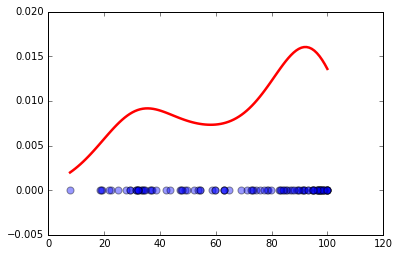

In [516]:
density = gaussian_kde(points)
xs = np.linspace(min(points)-0.01, max(points)+0.01, 100)
plt.plot(xs, density(xs), linewidth=2.5, color='red')
plt.scatter(points, np.zeros(len(points)), s=50, alpha=0.4)

Однако здесь аналогичные проблемы, что и у гистограммы: выбор "шага"

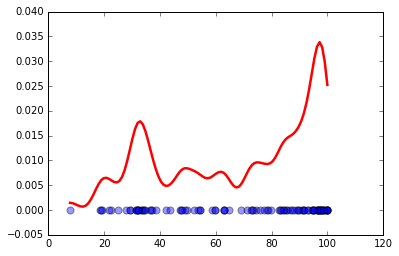

In [517]:
density = gaussian_kde(points, bw_method=0.1)
xs = np.linspace(min(points)-0.01, max(points)+0.01, 100)
plt.plot(xs, density(xs), linewidth=2.5, color='red')
plt.scatter(points, np.zeros(len(points)), s=50, alpha=0.4)

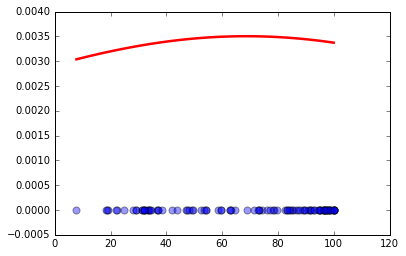

In [518]:
density = gaussian_kde(points, bw_method=4)
xs = np.linspace(min(points)-0.01, max(points)+0.01, 100)
plt.plot(xs, density(xs), linewidth=2.5, color='red')
plt.scatter(points, np.zeros(len(points)), s=50, alpha=0.4)

### Ящик с усами (диаграмма размаха)

![](http://i.imgur.com/7c7DSDg.png)

Первый ($Q_1$) и третий ($Q_3$) квартили — концы ящика, медиана (второй квартиль) — вертикальная линия внутри ящика, усы — $Q_1 - 1.5 * IQR$ и $Q_3 + 1.5 * IQR$, $IQR$ = interquartile range, $Q_3 - Q_1$, остальные точки — выбросы. Иногда усы строят чуть [по-другому](https://en.wikipedia.org/wiki/Box_plot).

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


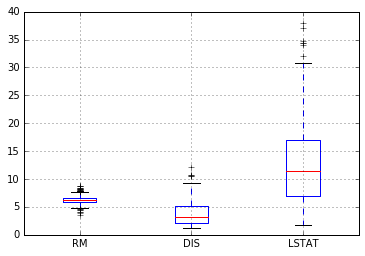

In [19]:
_ = data[['RM', 'DIS', 'LSTAT']].boxplot()

## Два признака

**Scatter Matrix** - скаттеры для каждой пары признаков

На диагонали матрицы стоит гистограмма или kde (параметр *diagonal*). 

In [520]:
from sklearn import datasets

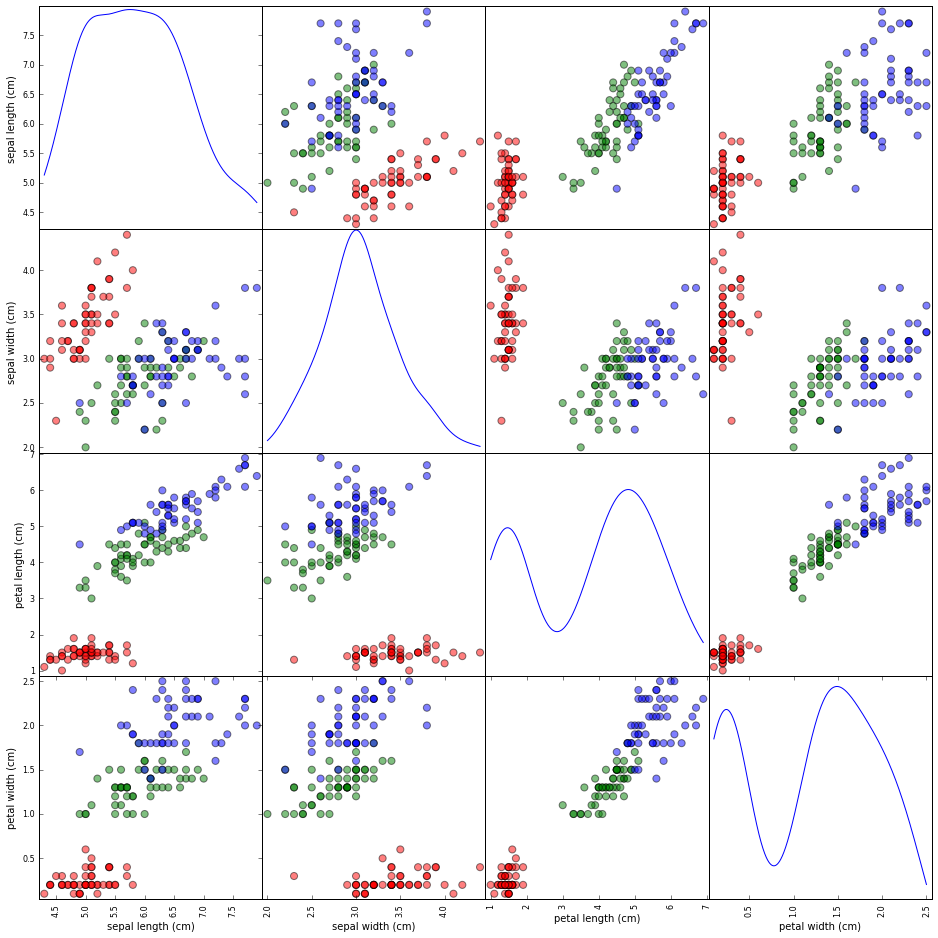

In [57]:
from pandas.tools.plotting import scatter_matrix

iris = datasets.load_iris()
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
c = ["red", "green", "blue"]
colors = [c[i] for i in iris['target']]
_ = scatter_matrix(data, figsize=(16, 16), diagonal='kde', s=200, c=colors)

## Дискретные признаки

Для начала просто дискретизуем признаки. 

In [46]:
f = (iris.data[:,3] - min(iris.data[:,3]))*4
feature = np.zeros(len(f))
feature[f > 1.5] = 1
feature[f > 2] = 2
feature[f > 6] = 3

Теперь изобразим их просто скаттером.

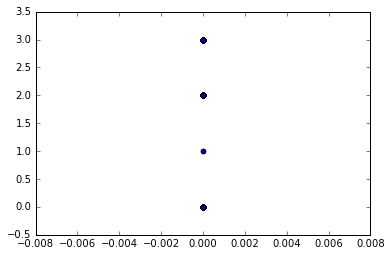

In [47]:
plt.scatter(np.zeros(feature.shape[0]), feature)

Кажется для дискретных признаков эта визуализация не очень информативна. Поэтому используем уже знакомый нам подход – сделаем jitter.

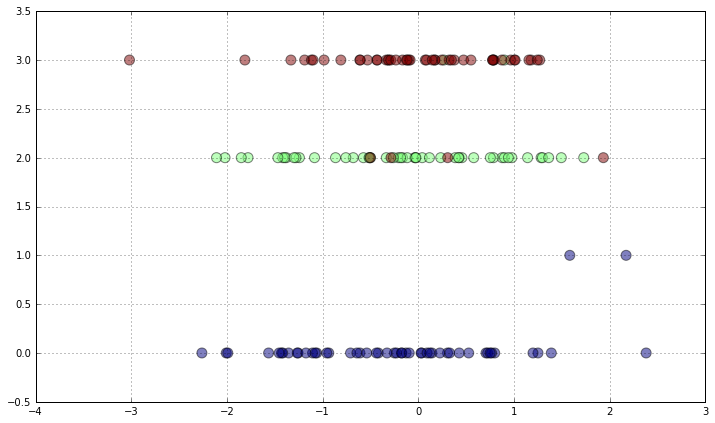

In [65]:
plt.figure(figsize=(12, 7))
plt.scatter(np.random.randn(len(feature)), feature, alpha=0.5, c=iris.target, s=100)
plt.grid(True)

## Sklearn

Библиотека с готовой реализацией алгоритмов машинного обучения ([sklearn](http://scikit-learn.org/stable/)).

### Модель линейной регрессии. 

Обучающая выборка: $x_i$ — объект ($\mathbb{R}^k$), $y_i$ — ответ ($\mathbb{R}$)

$X^l = \{(x_i, y_i)\}_{i=1}^l$

Пытаемся восстановить неизвестную зависимость $a(x) = f(x, w)$, где $w \in \mathbb{R}^p$ — параметры, $f$ — выбранное семейство функций. 

Предполагаем, что $y(x) \approx a(x)$

Задача сводится к нахождению $w$.


### Метод наименьших квадратов

$Q(w, X) = \sum_{i=1}^l(f(x_i; w) - y_i)^2 \to \min_{w}$

### Линейная регрессия

$f(x; w) = \sum_{i=1}^n w_i * x_i + w_0 = \langle w, x\rangle$ (добавляем константный признак к данным)

В двумерном пространстве соответствует прямой на плоскости.

### Аналитическое решение

$w = (X^TX)^{-1}X^Ty$

Для начала разделим все данные на обучающие и тестовые.

In [24]:
from sklearn.cross_validation import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, 
                                                    random_state=241, test_size=0.2)

Обучим модель линейной регрессии:

In [30]:
from sklearn.linear_model import LinearRegression

In [66]:
?LinearRegression

У всех алгоритмов машинного обучения в библиотеке sklearn похожий интерфейс: 
 - для начала нужно создать классификатор (и задать параметры, если требуется)
 - обучить модель необходимо вызвать метод fit, передав на вход матрицу с признаками и столбец ответов
 - для применения модели необходимо вызвать метод predict 

In [528]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Как мерить качество? 

Например, с помощью $MSE = \dfrac{1}{l}\sum_{i=1}^l{(a(x_i) - y_i)^2}$ или $MAE = \dfrac{1}{l}\sum_{i=1}^l{|a(x_i) - y_i|}$

Эти метрики уже реализованы в sklearn в модуле metrics:

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [530]:
mean_absolute_error(y_test, lr.predict(X_test))

3.39

In [531]:
mean_squared_error(y_test, lr.predict(X_test))

27.37

Как понять: 27 — это много или мало?

Можно ввести "нормированный" MSE — коэффициент детерминации:

$R^2 = 1 - \dfrac{\sum_{i=1}^l{(a(x_i) - y_i)^2}}{\sum_{i=1}^l{(y_i - \bar{y})^2}}$, где $\bar{y} = \dfrac{1}{l}\sum_{i=1}^l y_i$

Его уже можно интерпретировать:
- $R^2 \approx 1$ — отлично
- $R^2 \approx 0$ — плохо
- $R^2 < 0$ — ужасно

In [88]:
from sklearn.metrics import r2_score

In [533]:
r2_score(y_test, lr.predict(X_test))

0.66

В чем недостаток тукущего способа оценки качества? Если немного поменять разбиение выборки на обучающую/тестовую, то качество может сильно измениться!

In [534]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=13, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

print mean_absolute_error(y_test, lr.predict(X_test))
print mean_squared_error(y_test, lr.predict(X_test))
print r2_score(y_test, lr.predict(X_test))

3.64186894464
24.3636130537
0.731266198822


Что делать в этом случае? Можно несколько раз разбить выборку на обучающую/тестовую, и итоговым качеством алгоритма считать среднее качество. Этот подходи называетс *K-fold*.

![](http://scott.fortmann-roe.com/docs/docs/MeasuringError/crossvalidation.png)

Kfold также реализован в sklearn. Его обязательный параметр: размер выборки. Дальше вы можете по желанию указать количество фолдов (*n_folds*), и перемешивать ли данные (*shuffle*). В результате этот объект возвращает заданное количество (*n_folds*) количество пар индексов: для обучающей и тестовой выборки.

In [81]:
from sklearn.cross_validation import KFold

In [82]:
kFold = KFold(boston.target.shape[0], n_folds=5, shuffle=True, random_state=42)

In [83]:
def get_quality(regressor, X, y, kFold):
    metrics = {'mae': [], 'mse': [], 'r2': []}
    for train, test in kFold:
        regressor.fit(X[train], y[train])
        predict = regressor.predict(X[test])
        metrics['mae'].append(mean_absolute_error(y[test], predict))
        metrics['mse'].append(mean_squared_error(y[test], predict))
        metrics['r2'].append(r2_score(y[test], predict))
    return metrics

In [538]:
for metric, scores in get_quality(LinearRegression(), boston.data, boston.target, kFold).iteritems():
    print metric, np.mean(scores), np.std(scores)

mse 23.4932551603 1.84246315657
mae 3.39074777444 0.183852969097
r2 0.715147097604 0.037602797767


Чтобы можно было проинтерпретировать веса линейной модели, необходимо масштабировать данные. Например модифицируем данные таким образом, что:
 - среднее равно 0
 - среднеквадратичное отклонение равно 1

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaler.fit(boston.data)
scaled_data = scaler.transform(boston.data)

In [67]:
scaled_data

array([[-0.41771335,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41526932, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41527165, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ..., 
       [-0.41137448, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40568883, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41292893, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [68]:
np.mean(scaled_data, axis=0)

array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15,
         4.70199198e-16,   2.49032240e-15,  -1.14523016e-14,
        -1.40785495e-15,   9.21090169e-16,   5.44140929e-16,
        -8.86861950e-16,  -9.20563581e-15,   8.16310129e-15,
        -3.37016317e-16])

In [41]:
lr = LinearRegression().fit(scaled_data, boston.target)
for feature, coef in sorted(zip(boston.feature_names, lr.coef_), key=lambda x: abs(x[1]), reverse=True):
    print feature, coef

LSTAT -3.74867981912
DIS -3.10444805148
RM 2.67064141332
RAD 2.65878654091
TAX -2.07589814093
PTRATIO -2.06215592597
NOX -2.06009246354
ZN 1.08098057817
CRIM -0.9204111277
B 0.856640435817
CHAS 0.682203460284
INDUS 0.14296712402
AGE 0.0211206306213


Иногда после обучения линейной модели получаются слишком большие веса. Обычно это свидетельствует о переобучении. Поэтому в модель вводят регуляризацию, то есть штраф на слишком большие значения весов.

### Ridge regression

Например, так называемый $L_2$ регуляризатор — квадрат $L_2$ нормы вектора весов:

$\left\lVert w \right\rVert_2^2 = \sum_{j=1}^p w^2$

Теперь задача будет иметь следующий вид:

$Q(w, X) = \sum_{i=1}^l(f(x_i; w) - y_i)^2 + \alpha_2 \left\lVert w \right\rVert_2^2 \to \min_{w}$

In [541]:
from sklearn.linear_model import Ridge

In [542]:
for metric, scores in get_quality(Ridge(alpha=10), scaled_data, boston.target, kFold).iteritems():
    print metric, np.mean(scores), np.std(scores)

mse 23.5647341986 1.95053677092
mae 3.35621197703 0.201701366897
r2 0.714360180038 0.0377762819421


Остался вопрос как подбирать $\alpha$? И что это вообще такое?

В алгоритмах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели), в то время как гиперпараметры задаются заранее (например, $\alpha$ в регуляризованной линейной модели). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют перебор по сетке (grid search): для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать:

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит переобучение на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (train), валидация (validation) и контроль (test). Валидационную подвыборку используют для сравнения моделей, а test — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — кросс-валидация. Существуют различные схемы кросс-валидации:
  - Leave-One-Out (убираем из выборки один объект, обучаемся на оставшейся, предсказываем качество на убранном объекте)
  - K-Fold
  - Многократное случайное разбиение выборки

Для Ridge-регрессии реализован специальный класс, позволяющий подобрать оптимальное $\alpha$.

In [543]:
from sklearn.linear_model import RidgeCV

In [544]:
rcv = RidgeCV(alphas=(0.01, 0.1, 1.0), cv=kFold)
rcv.fit(scaled_data, boston.target)
rcv.alpha_

1.00

In [545]:
for metric, scores in get_quality(Ridge(alpha=1.0), scaled_data, boston.target, kFold).iteritems():
    print metric, np.mean(scores), np.std(scores)

mse 23.4927932848 1.85542596288
mae 3.3855230191 0.185203170524
r2 0.715158625182 0.0376359203817


### Lasso regression


$\left\lVert w \right\rVert_1 = \sum_{j=1}^p |w|$

Теперь задача будет иметь следующий вид:

$Q(w, X) = \sum_{i=1}^l(f(x_i; w) - y_i)^2 + \alpha_1 \left\lVert w \right\rVert_1 \to \min_{w}$

Качество в данном случае получилось немного меньше, в чем дело? После введения регуляризатора модель становится чувствительной к масштабу.

In [78]:
from sklearn.linear_model import Lasso, LassoCV

In [84]:
rcv = LassoCV(alphas=(0.001, 0.01, 0.1, 1.0, 10.0), cv=kFold)
rcv.fit(scaled_data, boston.target)
rcv.alpha_

0.01

In [89]:
for metric, scores in get_quality(Lasso(alpha=0.01), scaled_data, boston.target, kFold).iteritems():
    print metric, np.mean(scores), np.std(scores)

mse 23.4845738831 1.86459144401
mae 3.38158579565 0.186140273659
r2 0.715250581386 0.0377123576456


Особенность $L_1$ регуляризатора в том, что он "отбирает признаки": зануляет коэффициенты перед некоторыми "неважными" признаками. Например:

In [549]:
lasso = Lasso(alpha=0.01).fit(scaled_data, boston.target)
lasso.coef_

array([-0.89,  1.04,  0.05,  0.68, -1.98,  2.68,  0.  , -3.06,  2.48,
       -1.9 , -2.04,  0.85, -3.74])

### ElasticNet


$Q(w, X) = \sum_{i=1}^l(f(x_i; w) - y_i)^2 + \alpha_1 \left\lVert w \right\rVert_1 + \alpha_2 \left\lVert w \right\rVert_2^2\to \min_{w}$